In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error

In [ ]:
#for modeling
import xgboost as xgb
#styling
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/energy data/PJME_hourly.csv')


In [ ]:
df.head()

,Datetime,PJME_MW
0,2002-12-31 01:00:00,26498.0
1,2002-12-31 02:00:00,25147.0
2,2002-12-31 03:00:00,24574.0
3,2002-12-31 04:00:00,24393.0
4,2002-12-31 05:00:00,24860.0


In [ ]:
df= df.set_index('Datetime')

In [ ]:
color_pal= sns.color_palette()

<Axes: title={'center': 'Energy use in MW'}, xlabel='Datetime'>

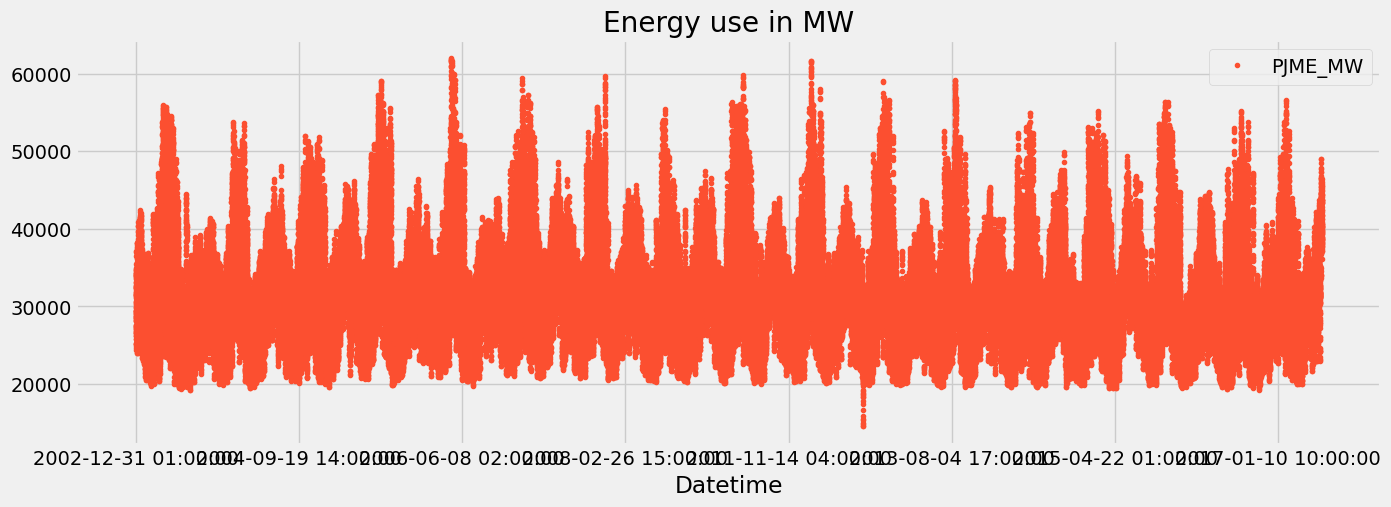

In [ ]:
df.plot(style='.',figsize=(15, 5), color=color_pal[1],title='Energy use in MW')

In [ ]:
print(df.index)

Index(['2002-12-31 01:00:00', '2002-12-31 02:00:00', '2002-12-31 03:00:00',
       '2002-12-31 04:00:00', '2002-12-31 05:00:00', '2002-12-31 06:00:00',
       '2002-12-31 07:00:00', '2002-12-31 08:00:00', '2002-12-31 09:00:00',
       '2002-12-31 10:00:00',
       ...
       '2018-01-01 15:00:00', '2018-01-01 16:00:00', '2018-01-01 17:00:00',
       '2018-01-01 18:00:00', '2018-01-01 19:00:00', '2018-01-01 20:00:00',
       '2018-01-01 21:00:00', '2018-01-01 22:00:00', '2018-01-01 23:00:00',
       '2018-01-02 00:00:00'],
      dtype='object', name='Datetime', length=145366)


In [ ]:
df.index= pd.to_datetime(df.index)

<Axes: title={'center': 'Energy use in MW'}, xlabel='Datetime'>

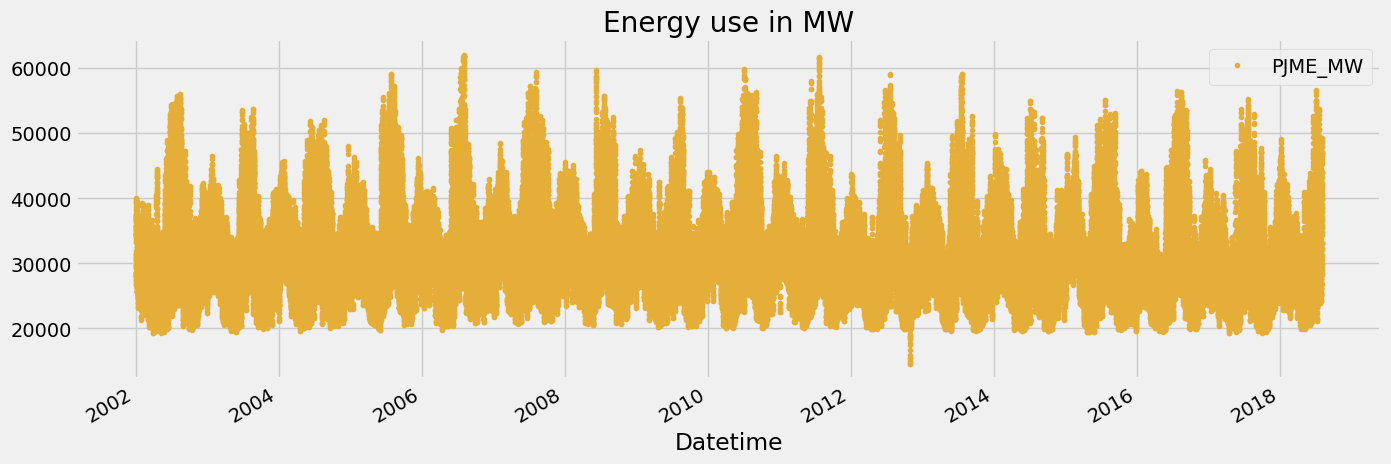

In [ ]:
df.plot(style='.',figsize=(15, 5),
        color=color_pal[2],
        title='Energy use in MW')

Train/test /split ( Data prep)

In [ ]:
train =df.loc[df.index < '01-01-2015']
test =df.loc[df.index >= '01-01-2015']

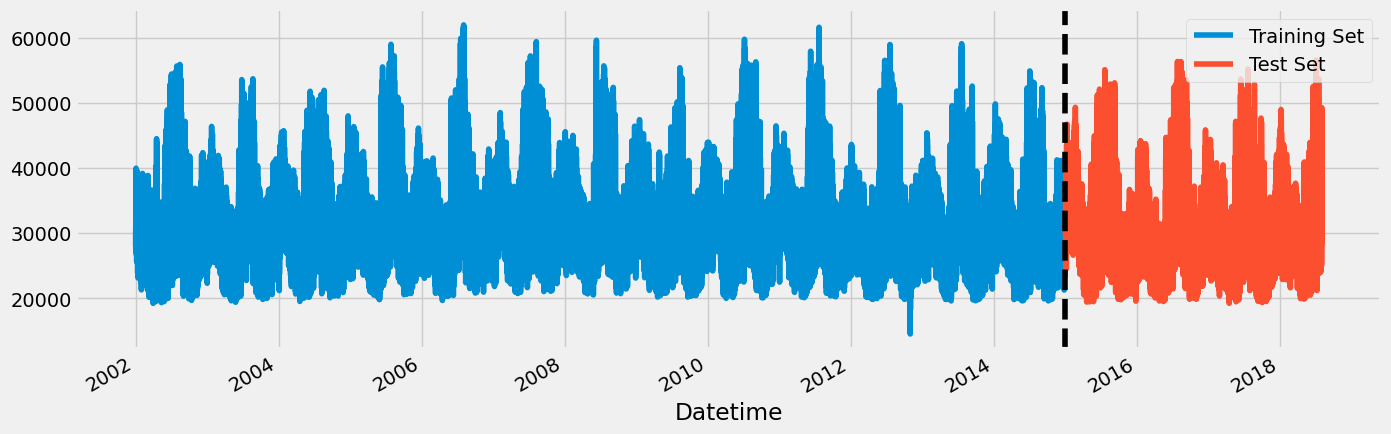

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, label='Training Set')
test.plot(ax=ax, label ='Test Set')
ax.axvline('01-01-2015',color='black',ls='--')
ax.legend(['Training Set','Test Set'])
plt.show()

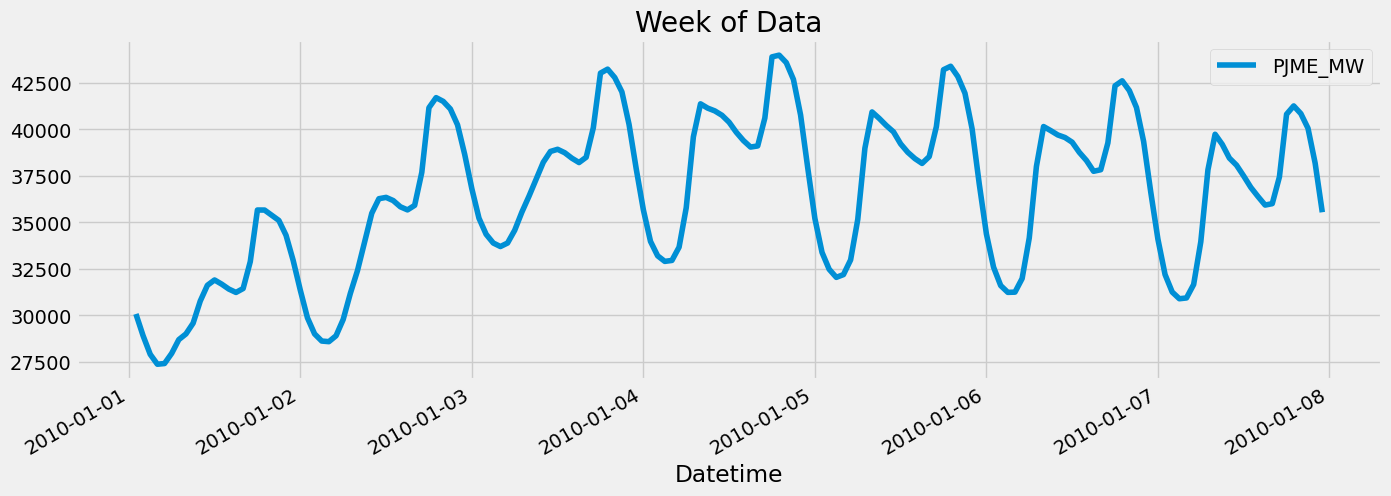

In [ ]:
df.loc[(df.index >'01-01-2010') & (df.index < '01-08-2010')].plot(figsize=(15,5), title = "Week of Data")
plt.show()

Feature Creation ( create time series based on time series idex.)

In [ ]:
def create_features(df):
  df['hour']=df.index.hour
  df['dayofweek']=df.index.day_of_week #Monday:0 , sunday =6
  df['quarter']=df.index.quarter
  df['month']=df.index.month
  df['year']=df.index.year
  df['dayofyear']=df.index.dayofyear
  return df

In [ ]:
df= create_features(df)

Visualize our features/target Relationship

Text(0.5, 1.0, 'MW by hour')

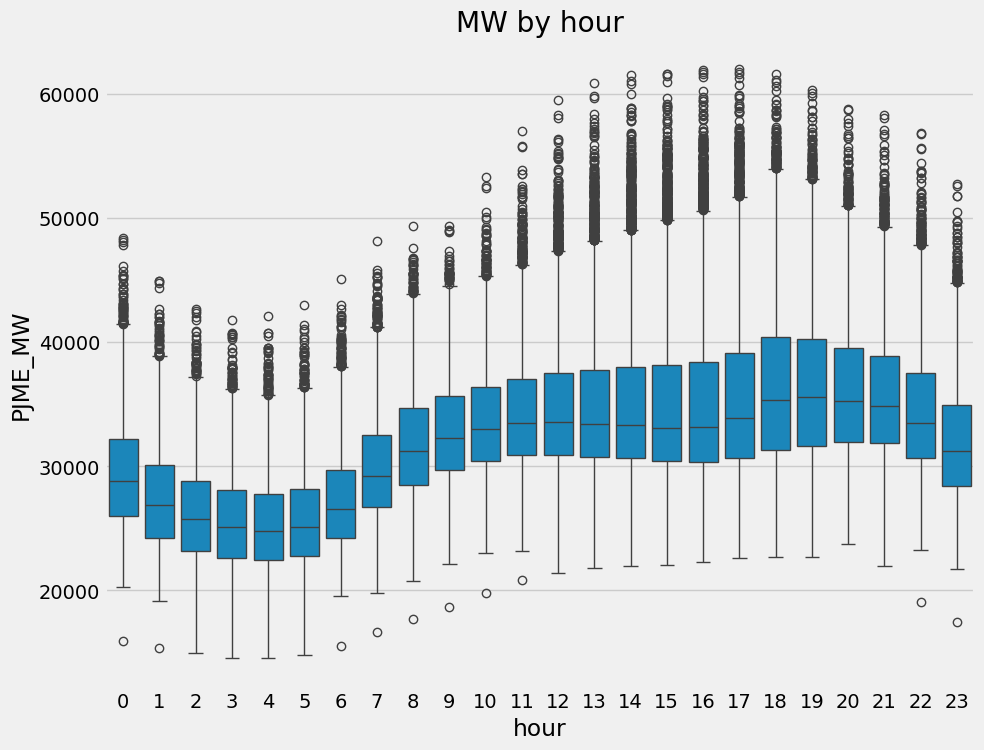

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(data=df, x='hour', y='PJME_MW')
ax.set_title('MW by hour')

<ipython-input-94-760708007eba>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='month', y='PJME_MW',palette=brown_palette)
<ipython-input-94-760708007eba>:4: UserWarning: 
The palette list has fewer values (6) than needed (12) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(data=df, x='month', y='PJME_MW',palette=brown_palette)


Text(0.5, 1.0, 'MW by month')

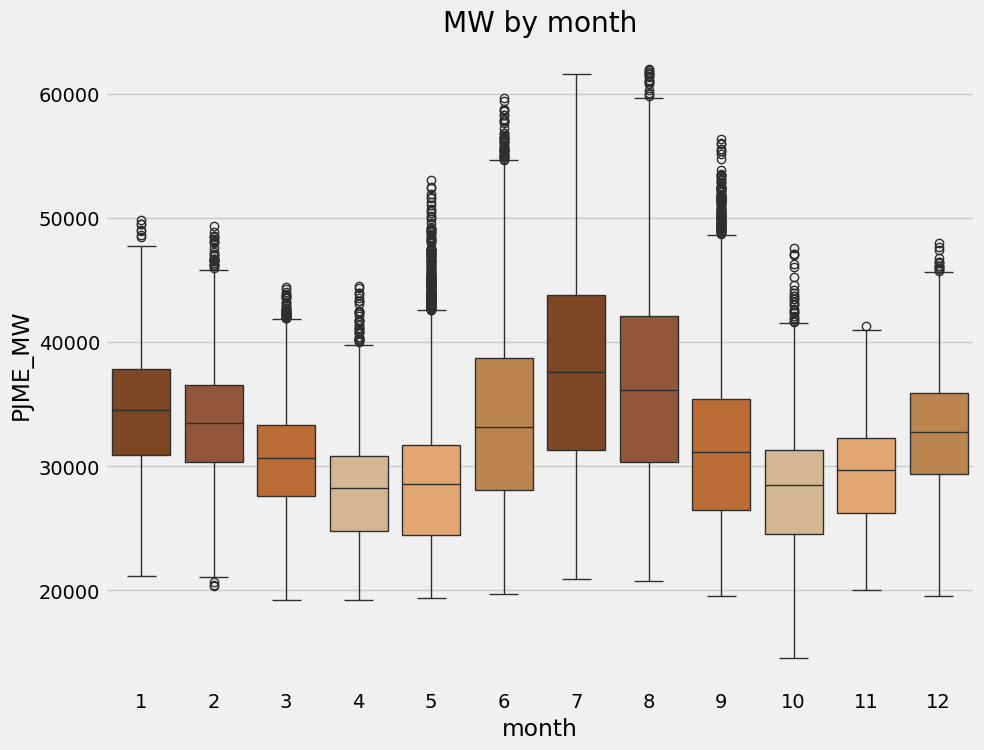

In [ ]:
# Define a custom brown palette
brown_palette = ["#8B4513", "#A0522D", "#D2691E", "#DEB887", "#F4A460", "#CD853F"]
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(data=df, x='month', y='PJME_MW',palette=brown_palette)
ax.set_title('MW by month')

Create our Model using XGBRegressor

In [ ]:
train = create_features(train)
test = create_features(test)

<ipython-input-91-155c35ea3eff>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour']=df.index.hour
<ipython-input-91-155c35ea3eff>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dayofweek']=df.index.day_of_week #Monday:0 , sunday =6
<ipython-input-91-155c35ea3eff>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

In [ ]:
df.columns

Index(['PJME_MW', 'hour', 'dayofweek', 'quarter', 'month', 'year',
       'dayofyear'],
      dtype='object')

In [ ]:
FEATURES = ['hour', 'dayofweek', 'quarter', 'month', 'year',
       'dayofyear']
TARGET = 'PJME_MW'

In [ ]:
X_train= train[FEATURES]
y_train=train[TARGET]
X_test= test[FEATURES]
y_test=test[TARGET]

In [ ]:
# Initialize the XGBRegressor model with 1000 decision trees
reg = xgb.XGBRegressor(n_estimators=1000,early_stopping_rounds=50,learning_rate=0.01)
reg.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test,y_test)],
        verbose=100)
#verbose for tracking the model's performance (when it 100 => means every 100 trees)


[0]	validation_0-rmse:6407.35736	validation_1-rmse:6479.81619
[100]	validation_0-rmse:3911.97994	validation_1-rmse:4312.03224
[200]	validation_0-rmse:3244.38509	validation_1-rmse:3864.56545
[300]	validation_0-rmse:2996.08999	validation_1-rmse:3748.76687
[400]	validation_0-rmse:2830.28024	validation_1-rmse:3744.93340
[416]	validation_0-rmse:2804.52217	validation_1-rmse:3748.41719


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Feature importance

In [ ]:
fi=pd.DataFrame(data=reg.feature_importances_,
                index=reg.feature_names_in_,
                columns=['importance'])

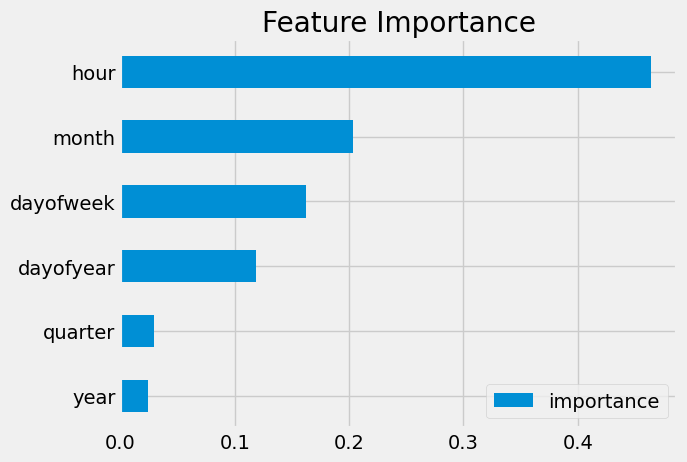

In [ ]:
fi.sort_values('importance').plot(kind='barh',title='Feature Importance')
plt.show()

Forecast on Test

In [ ]:
test['prediction']=reg.predict(X_test)

<ipython-input-107-4801574d8f6d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['prediction']=reg.predict(X_test)


In [ ]:
df

,PJME_MW,hour,dayofweek,quarter,month,year,dayofyear
Datetime,,,,,,,
2002-12-31 01:00:00,26498.0,1,1,4,12,2002,365
2002-12-31 02:00:00,25147.0,2,1,4,12,2002,365
2002-12-31 03:00:00,24574.0,3,1,4,12,2002,365
2002-12-31 04:00:00,24393.0,4,1,4,12,2002,365
2002-12-31 05:00:00,24860.0,5,1,4,12,2002,365
...,...,...,...,...,...,...,...
2018-01-01 20:00:00,44284.0,20,0,1,1,2018,1
2018-01-01 21:00:00,43751.0,21,0,1,1,2018,1
2018-01-01 22:00:00,42402.0,22,0,1,1,2018,1


In [139]:
df=df.merge(test[['prediction']], how='left',left_index=True,right_index=True)
df.tail()

<ipython-input-139-932bd4bfe0a6>:1: FutureWarning: Passing 'suffixes' which cause duplicate columns {'prediction_x'} in the result is deprecated and will raise a MergeError in a future version.
  df=df.merge(test[['prediction']], how='left',left_index=True,right_index=True)


,PJME_MW,hour,dayofweek,quarter,month,year,dayofyear,prediction_x,prediction_y,prediction_x,prediction_y
Datetime,,,,,,,,,,,
2018-08-02 20:00:00,44057.0,20,3,3,8,2018,214,41545.953125,41545.953125,41545.953125,41545.953125
2018-08-02 21:00:00,43256.0,21,3,3,8,2018,214,41135.625000,41135.625000,41135.625000,41135.625000
2018-08-02 22:00:00,41552.0,22,3,3,8,2018,214,39968.492188,39968.492188,39968.492188,39968.492188
2018-08-02 23:00:00,38500.0,23,3,3,8,2018,214,36870.242188,36870.242188,36870.242188,36870.242188
2018-08-03 00:00:00,35486.0,0,4,3,8,2018,215,32298.005859,32298.005859,32298.005859,32298.005859


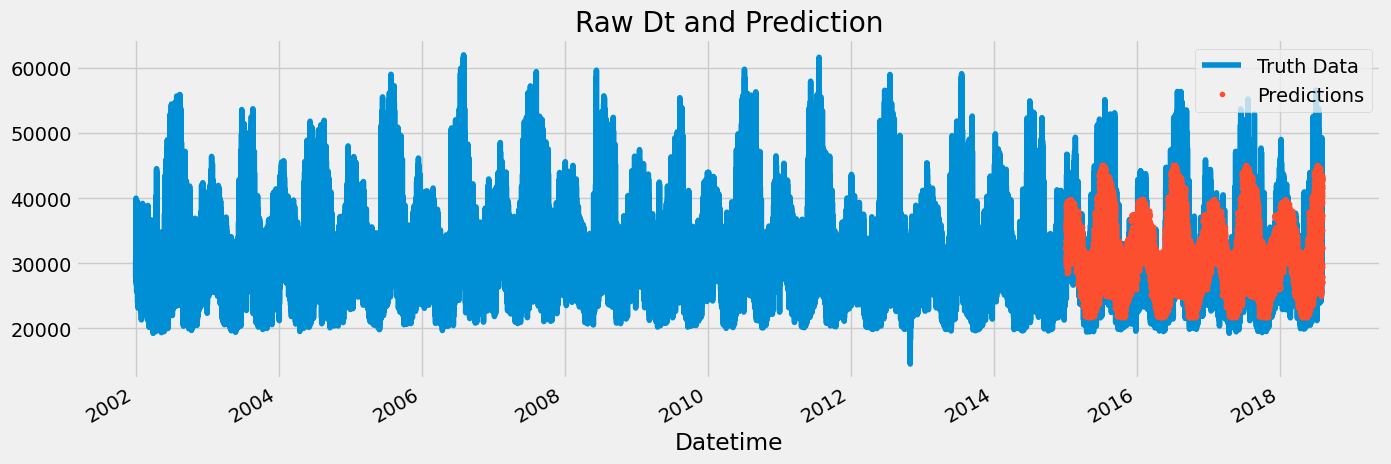

In [122]:
ax=df[['PJME_MW']].plot(figsize=(15, 5))
df['prediction'].plot(ax=ax,style='.')
plt.legend(['Truth Data','Predictions'])
ax.set_title('Raw Dt and Prediction')
plt.show()

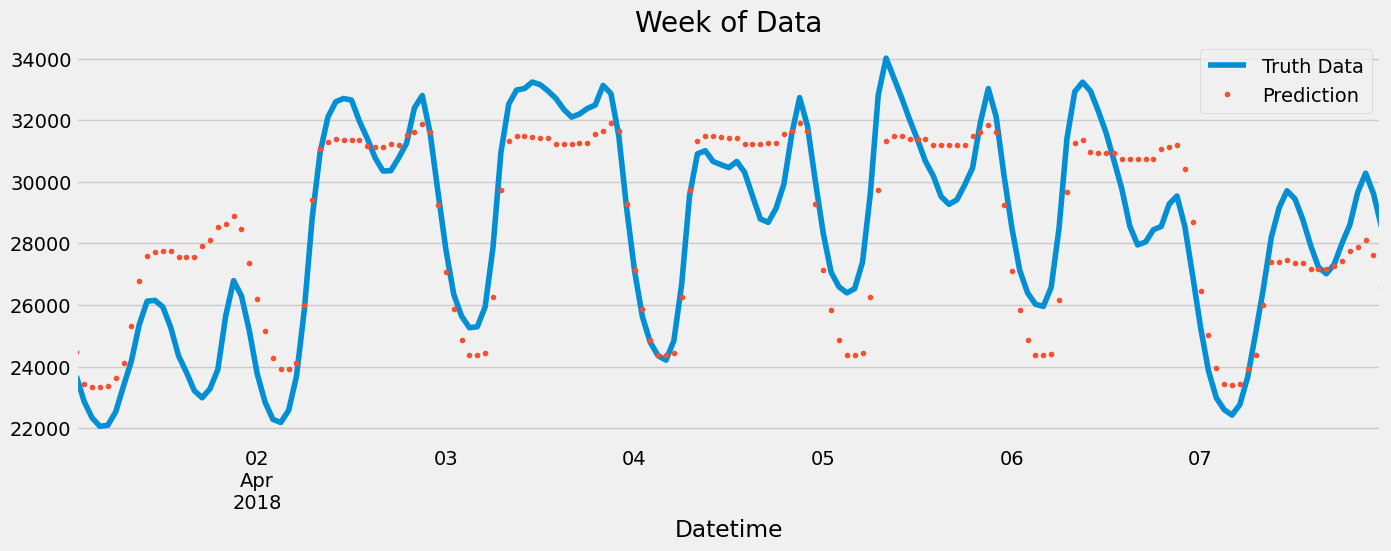

In [125]:
ax=df.loc[(df.index>'04-01-2018')&(df.index < '04-08-2018')]['PJME_MW']\
   .plot(figsize=(15, 5), title='Week of Data')
df.loc[(df.index > '04-01-2018') & (df.index < '04-08-2018')]['prediction']\
    .plot(style='.')
plt.legend(['Truth Data', 'Prediction'])
plt.show()

evaluation metrics

In [128]:
score=np.sqrt(mean_squared_error(test['PJME_MW'], test['prediction']))

Calculate Error

worst and best predicted day

In [133]:
test['error']=np.abs(test[TARGET]-test['prediction'])
test['error']

<ipython-input-133-27615ced7ae9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['error']=np.abs(test[TARGET]-test['prediction'])


Datetime
2015-01-01 00:00:00     408.648438
2015-12-31 01:00:00    4735.167969
2015-12-31 02:00:00    4721.017578
2015-12-31 03:00:00    5062.720703
2015-12-31 04:00:00    5246.720703
                          ...     
2018-01-01 20:00:00    5660.753906
2018-01-01 21:00:00    5255.515625
2018-01-01 22:00:00    6172.472656
2018-01-01 23:00:00    5022.246094
2018-01-02 00:00:00    6268.287109
Name: error, Length: 31440, dtype: float64

In [135]:
test['date']=test.index.date

<ipython-input-135-c5f8a9410501>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['date']=test.index.date


In [138]:
test.groupby(['date'])['error'].mean().sort_values(ascending=False).head(5)

date
2016-08-13    13829.866211
2016-08-14    13577.304362
2016-09-10    11235.855143
2016-09-09    11032.220215
2016-08-12    10667.820312
Name: error, dtype: float64

thoese are the worst days